In [1]:
import sys
from pathlib import Path

# Get the absolute path to the project root
notebook_path = Path('/Users/nirmal/Documents/np_research/ManGo_code/ManGo')
project_root = str(notebook_path)

# Add the project root to Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now you can import your module
from src.models.mg_rig import RobustRegressor

# Verify the import worked
print(f"Project root: {project_root}")
print(f"Available at: {RobustRegressor.__module__}")

Project root: /Users/nirmal/Documents/np_research/ManGo_code/ManGo
Available at: src.models.mg_rig


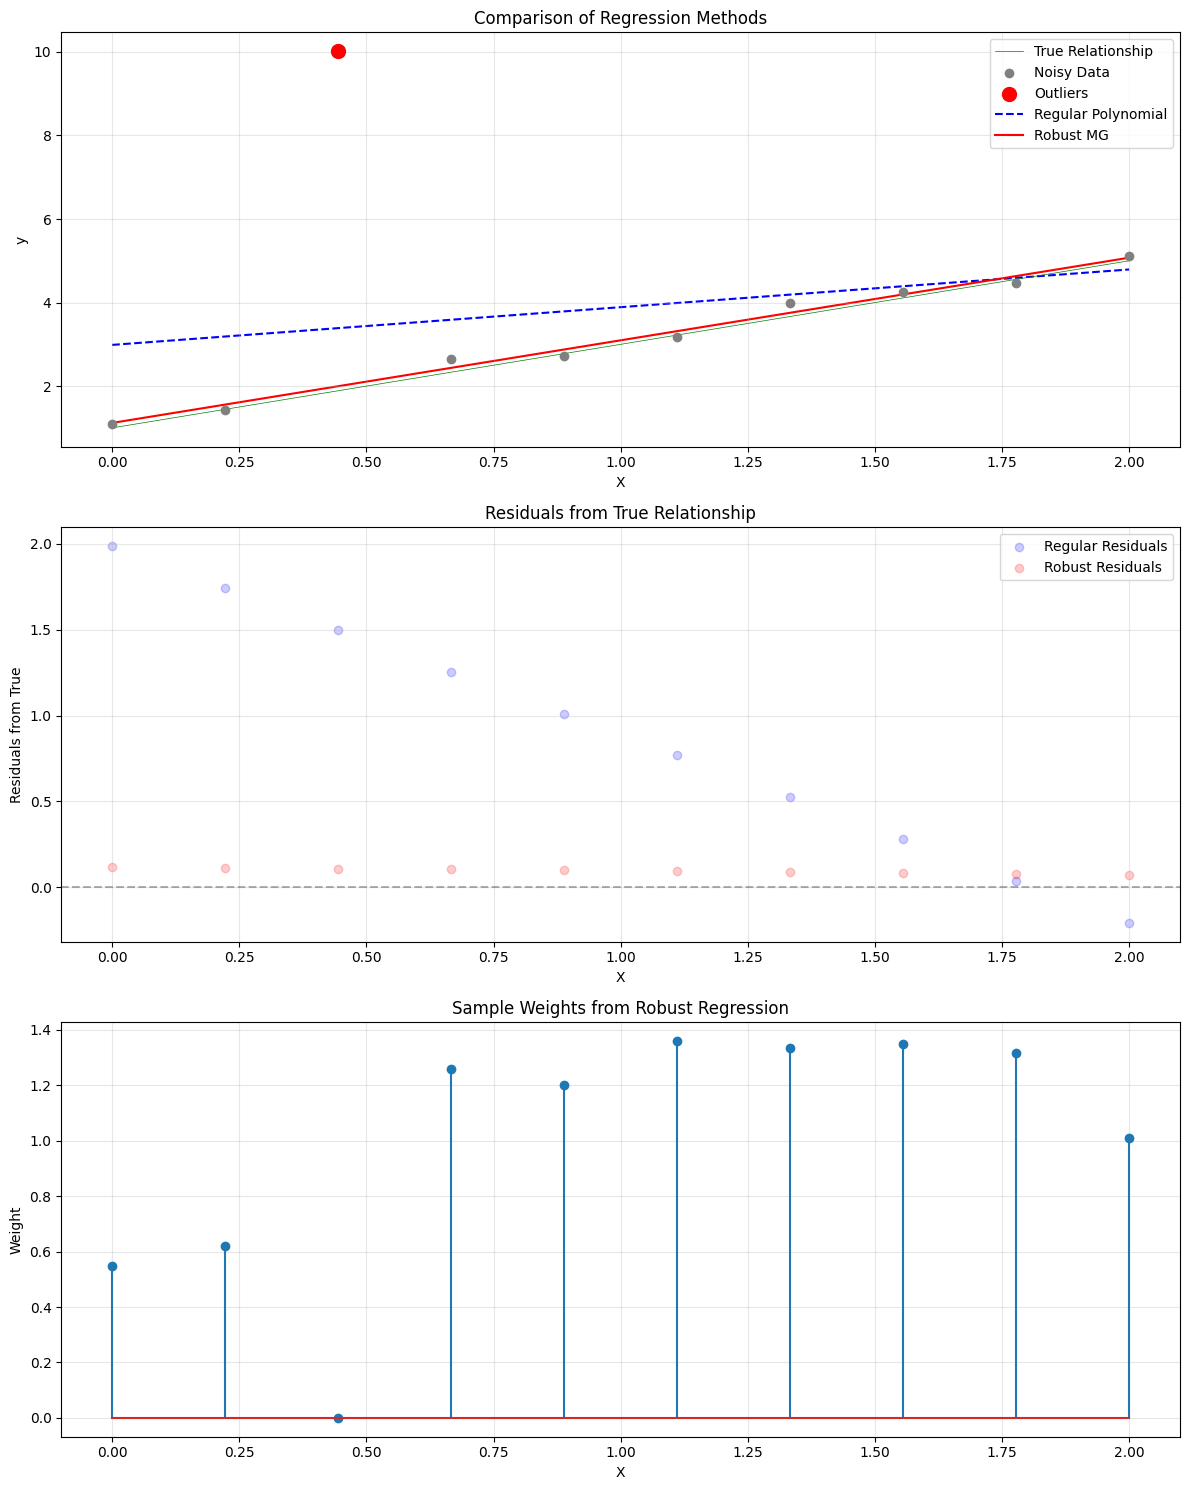

Coefficients:
True:     [1, 2]
Regular:  [0.         0.90288057]
Robust MG: [1.11846641 1.97792406]

MSE against true relationship (excluding outliers):
Regular Polynomial: 1.5967
Robust MG:         0.0104


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 2 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 0.2, 10)
y_noisy = y_clean + noise
# y_noisy[2] += [8.0]  # Add outliers
y_noisy[2] = y_noisy[2] + 8.0 

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree, tol=10-8)
mg_model.fit(X, y_noisy)
y_pred_robust = mg_model.predict(X)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

model coeff: [ 3.46921665 -8.85232806 18.1208729 ]


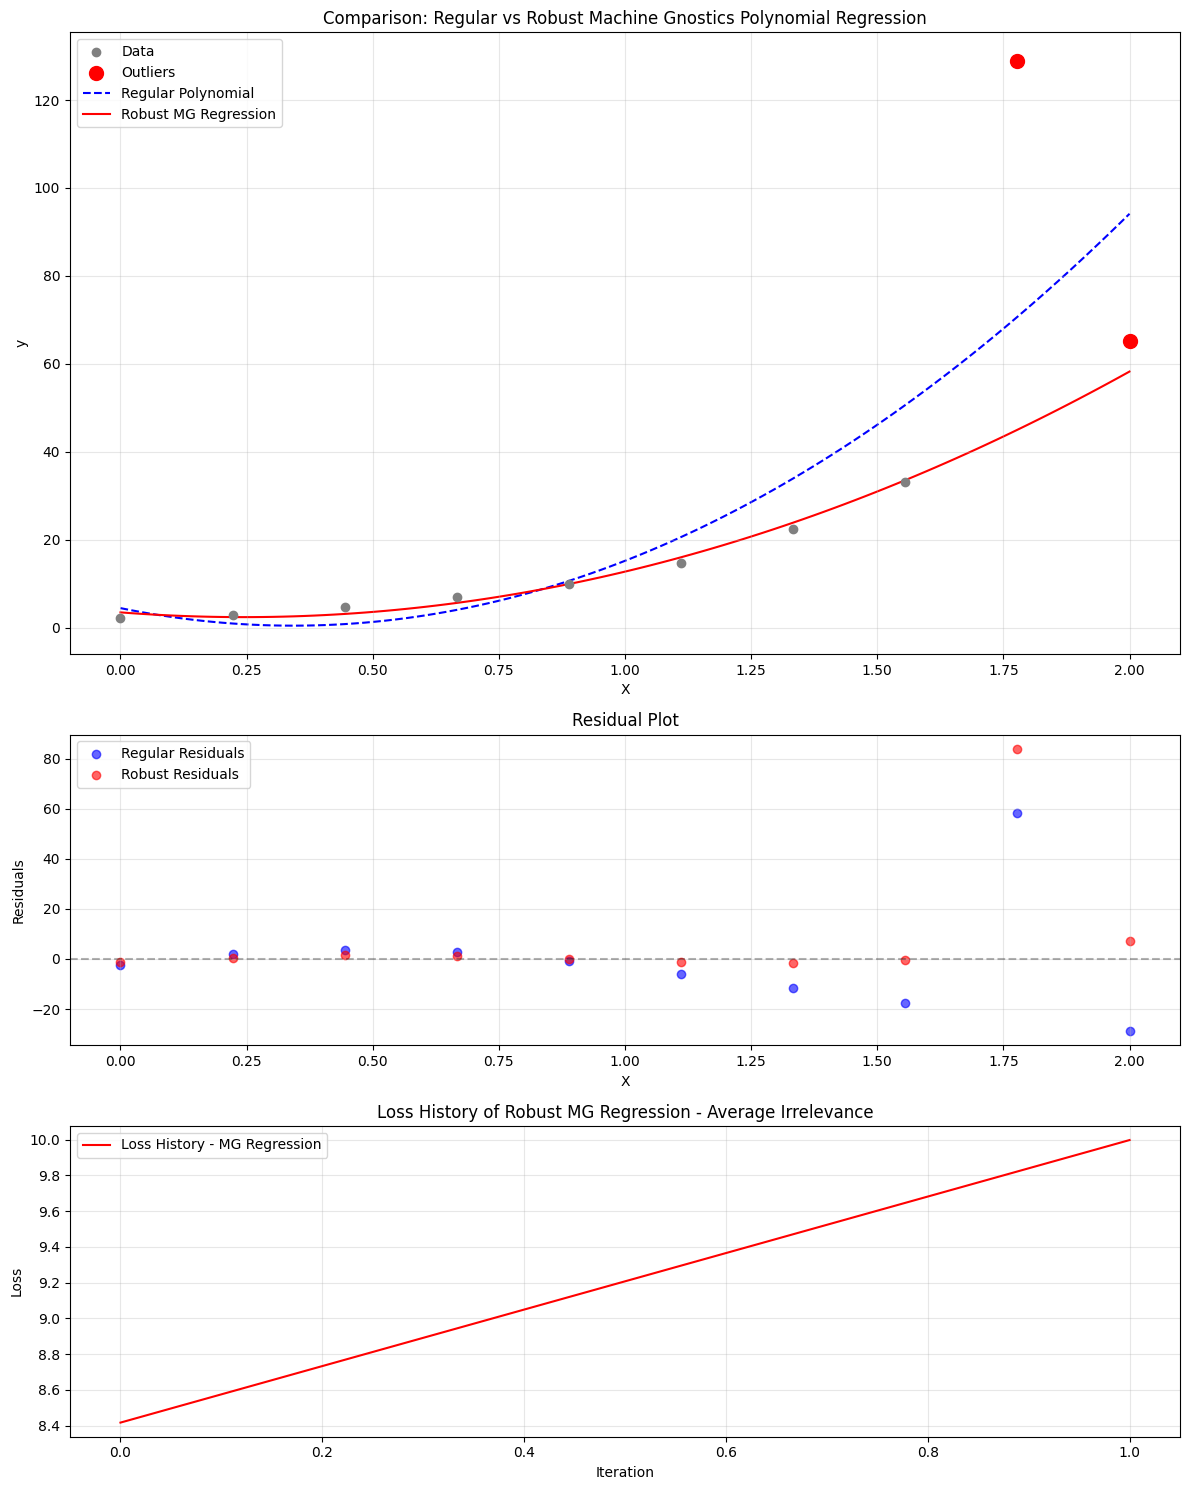

MSE (excluding outliers):
Regular Polynomial: 63.8383
Robust MG Regression: 1.2846

Max Absolute Residuals (excluding outliers):
Regular Polynomial: 17.5910
Robust MG Regression: 1.5188


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from src.models.mg_rig import RobustRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y = 2.0 * np.exp(1.8 * X.ravel()) + np.random.normal(0, 0.2, 10)
# y = 2*X +1
y[8:] += [80.0, -8.0]  # Add outliers
# Introduce outliers
# y[8:] += np.array([8.0, -80.0])  # one high outlier, one low outlier

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit regular polynomial regression
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y)
y_pred_regular = poly_reg.predict(X)  # Predict on training points for residuals
y_pred_regular_test = poly_reg.predict(X_test)  # Predict on test points for curve

# Fit robust Machine Gnostics regression
mg_model = RobustRegressor(degree=degree)
mg_model.fit(X, y.flatten())
y_pred_robust = mg_model.predict(X)  # Predict on training points for residuals
y_pred_robust_test = mg_model.predict(X_test)  # Predict on test points for curve
print(f'model coeff: {mg_model.coefficients}')

# Calculate residuals
residuals_regular = y - y_pred_regular
residuals_robust = y - y_pred_robust

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), height_ratios=[2, 1, 1])

# Plot regression curves
ax1.scatter(X, y, color='gray', label='Data', zorder=2)
ax1.scatter(X[8:], y[8:], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison: Regular vs Robust Machine Gnostics Polynomial Regression')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# plot history of loss
ax3.plot(mg_model._history, color='red', label='Loss History - MG Regression')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Loss')
ax3.set_title('Loss History of Robust MG Regression - Average Irrelevance')

ax3.legend()
ax3.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print mean squared error for both methods (excluding outliers)
mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
print(f"MSE (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG Regression: {mse_robust:.4f}")

# Print max absolute residuals (excluding outliers)
max_resid_regular = np.max(np.abs(residuals_regular[:-2]))
max_resid_robust = np.max(np.abs(residuals_robust[:-2]))
print(f"\nMax Absolute Residuals (excluding outliers):")
print(f"Regular Polynomial: {max_resid_regular:.4f}")
print(f"Robust MG Regression: {max_resid_robust:.4f}")


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 375.9472
Ridge Regression:   393.6559
Lasso Regression:   374.0560
Robust MG:          68.0664

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 516.3775
Ridge Regression:   505.5366
Lasso Regression:   508.2516
Robust MG:          5.7569

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 518.3422
Ridge Regression:   489.9117
Lasso Regression:   513.7563
Robust MG:          33.5862

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 550.7217
Ridge Regression:   469.4905
Lasso Regression:   545.9007
Robust MG:          31.7249


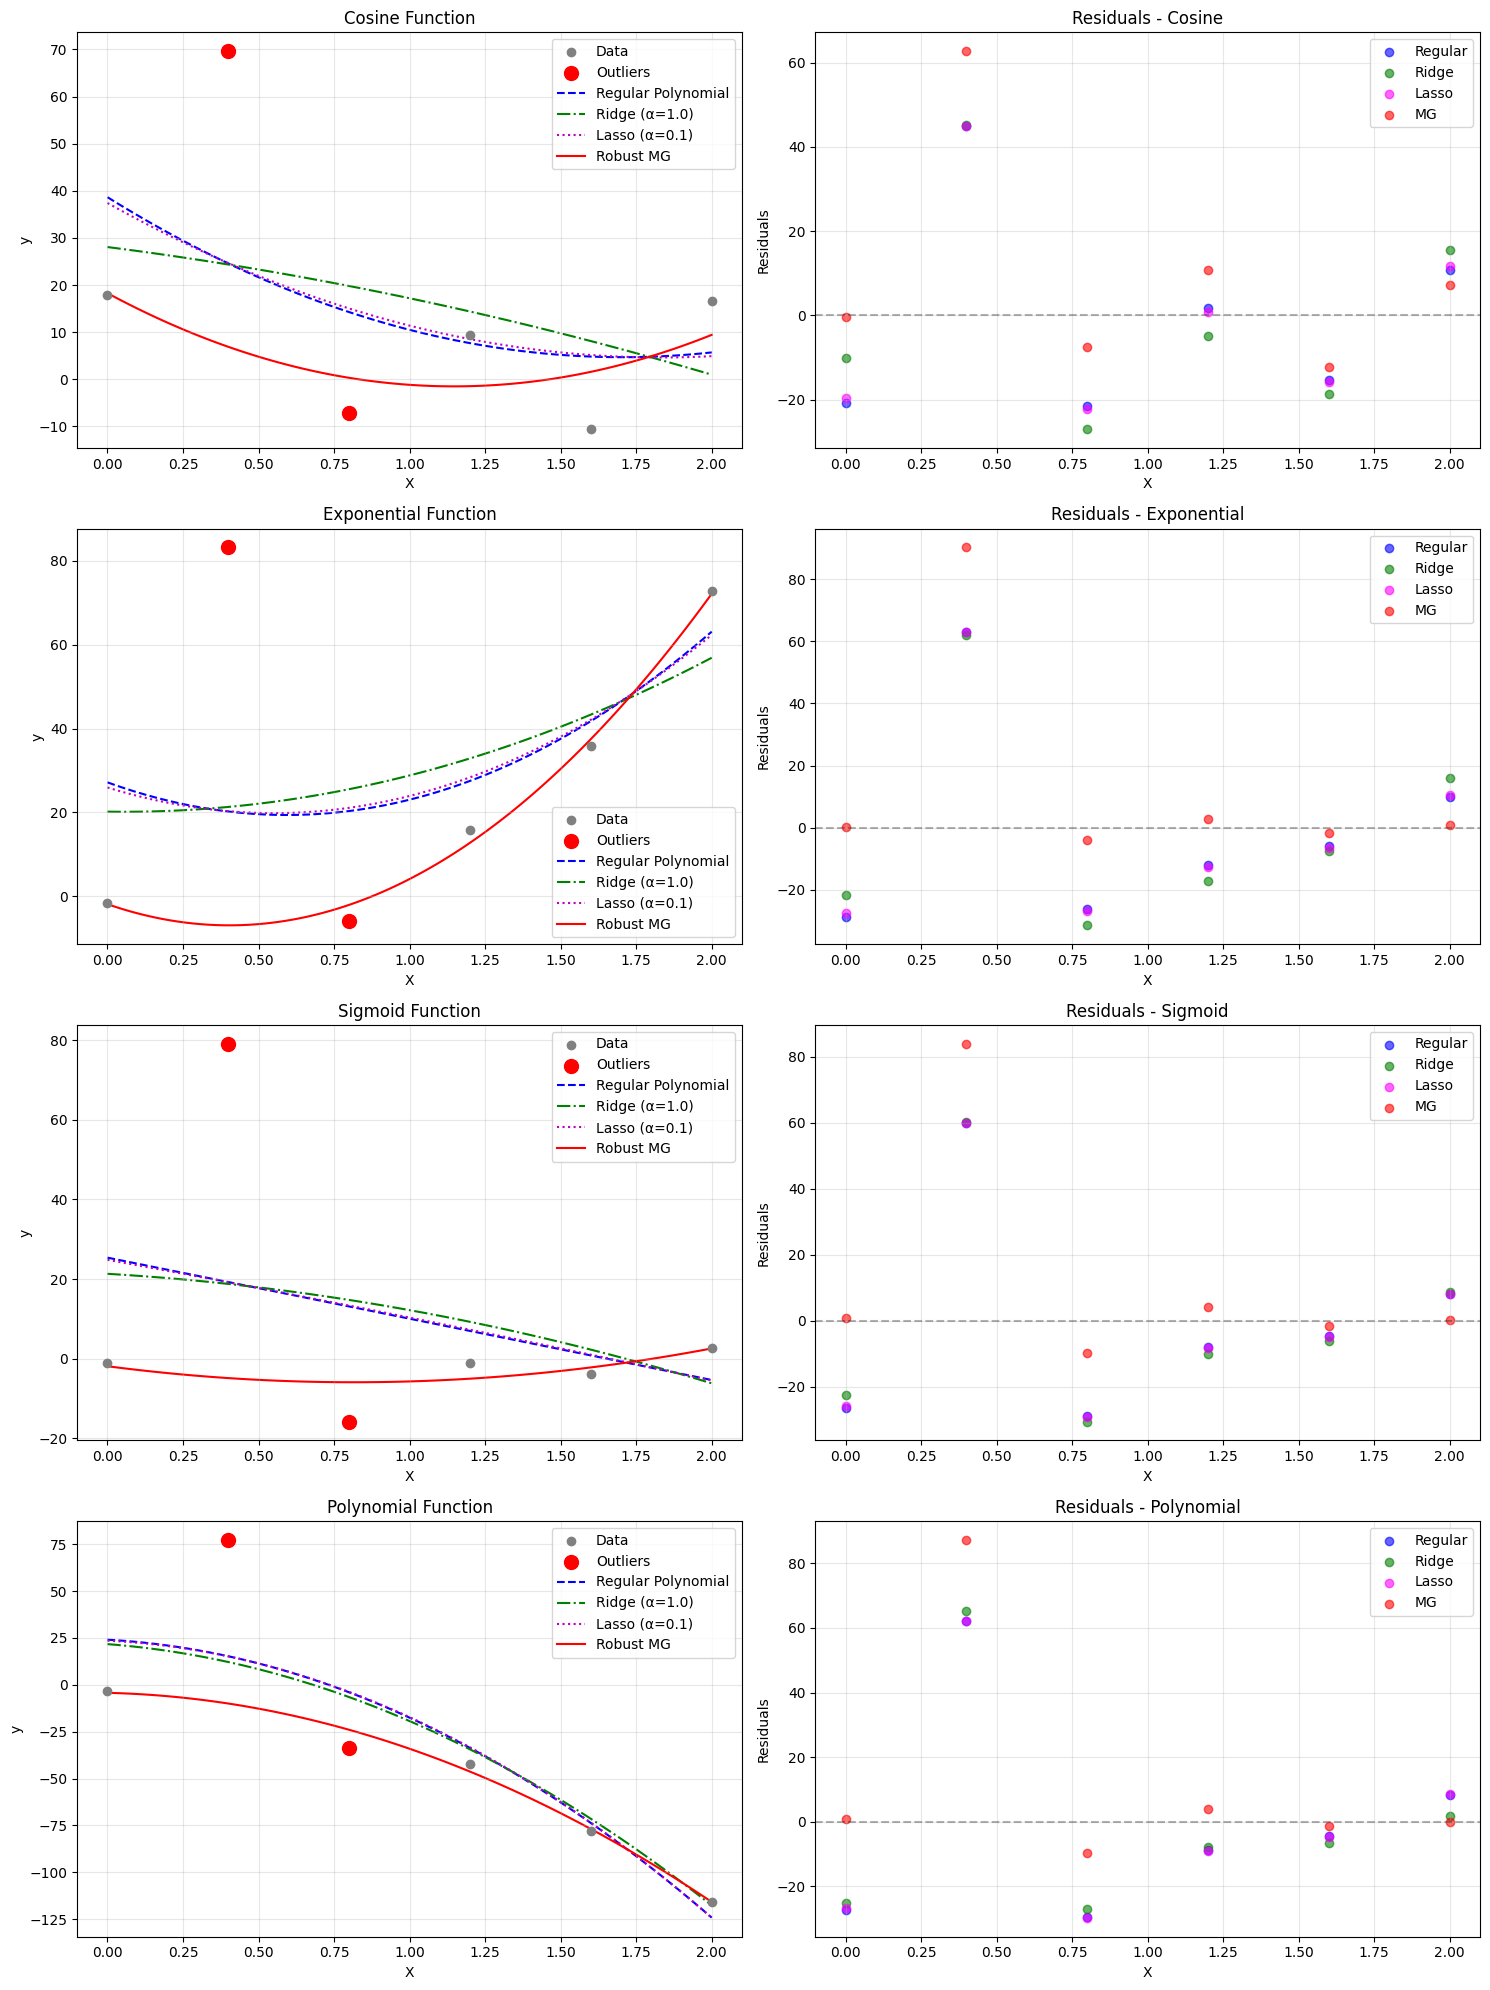

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Create multiple test functions
def generate_data(func_type, X, noise_level=1.8, outlier_positions=[1, 2], outlier_values=[80.0, -15.0]):
    if func_type == 'cosine':
        y = 15 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 1.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 0.05 * X.ravel()**3 - 30 * X.ravel()**2 + 1
    
    y = y + np.random.normal(0, noise_level, len(X))
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data - changed to 5 points
    X = np.linspace(0, 2, 6).reshape(-1, 1)  # 5 points total
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Fit models
    degree = 2  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.6)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.6)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 445.5874
Robust MG Regression: 548.5054

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 523.2084
Robust MG Regression: 733.4053

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 522.8897
Robust MG Regression: 737.9625

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 503.3894
Robust MG Regression: 713.7466


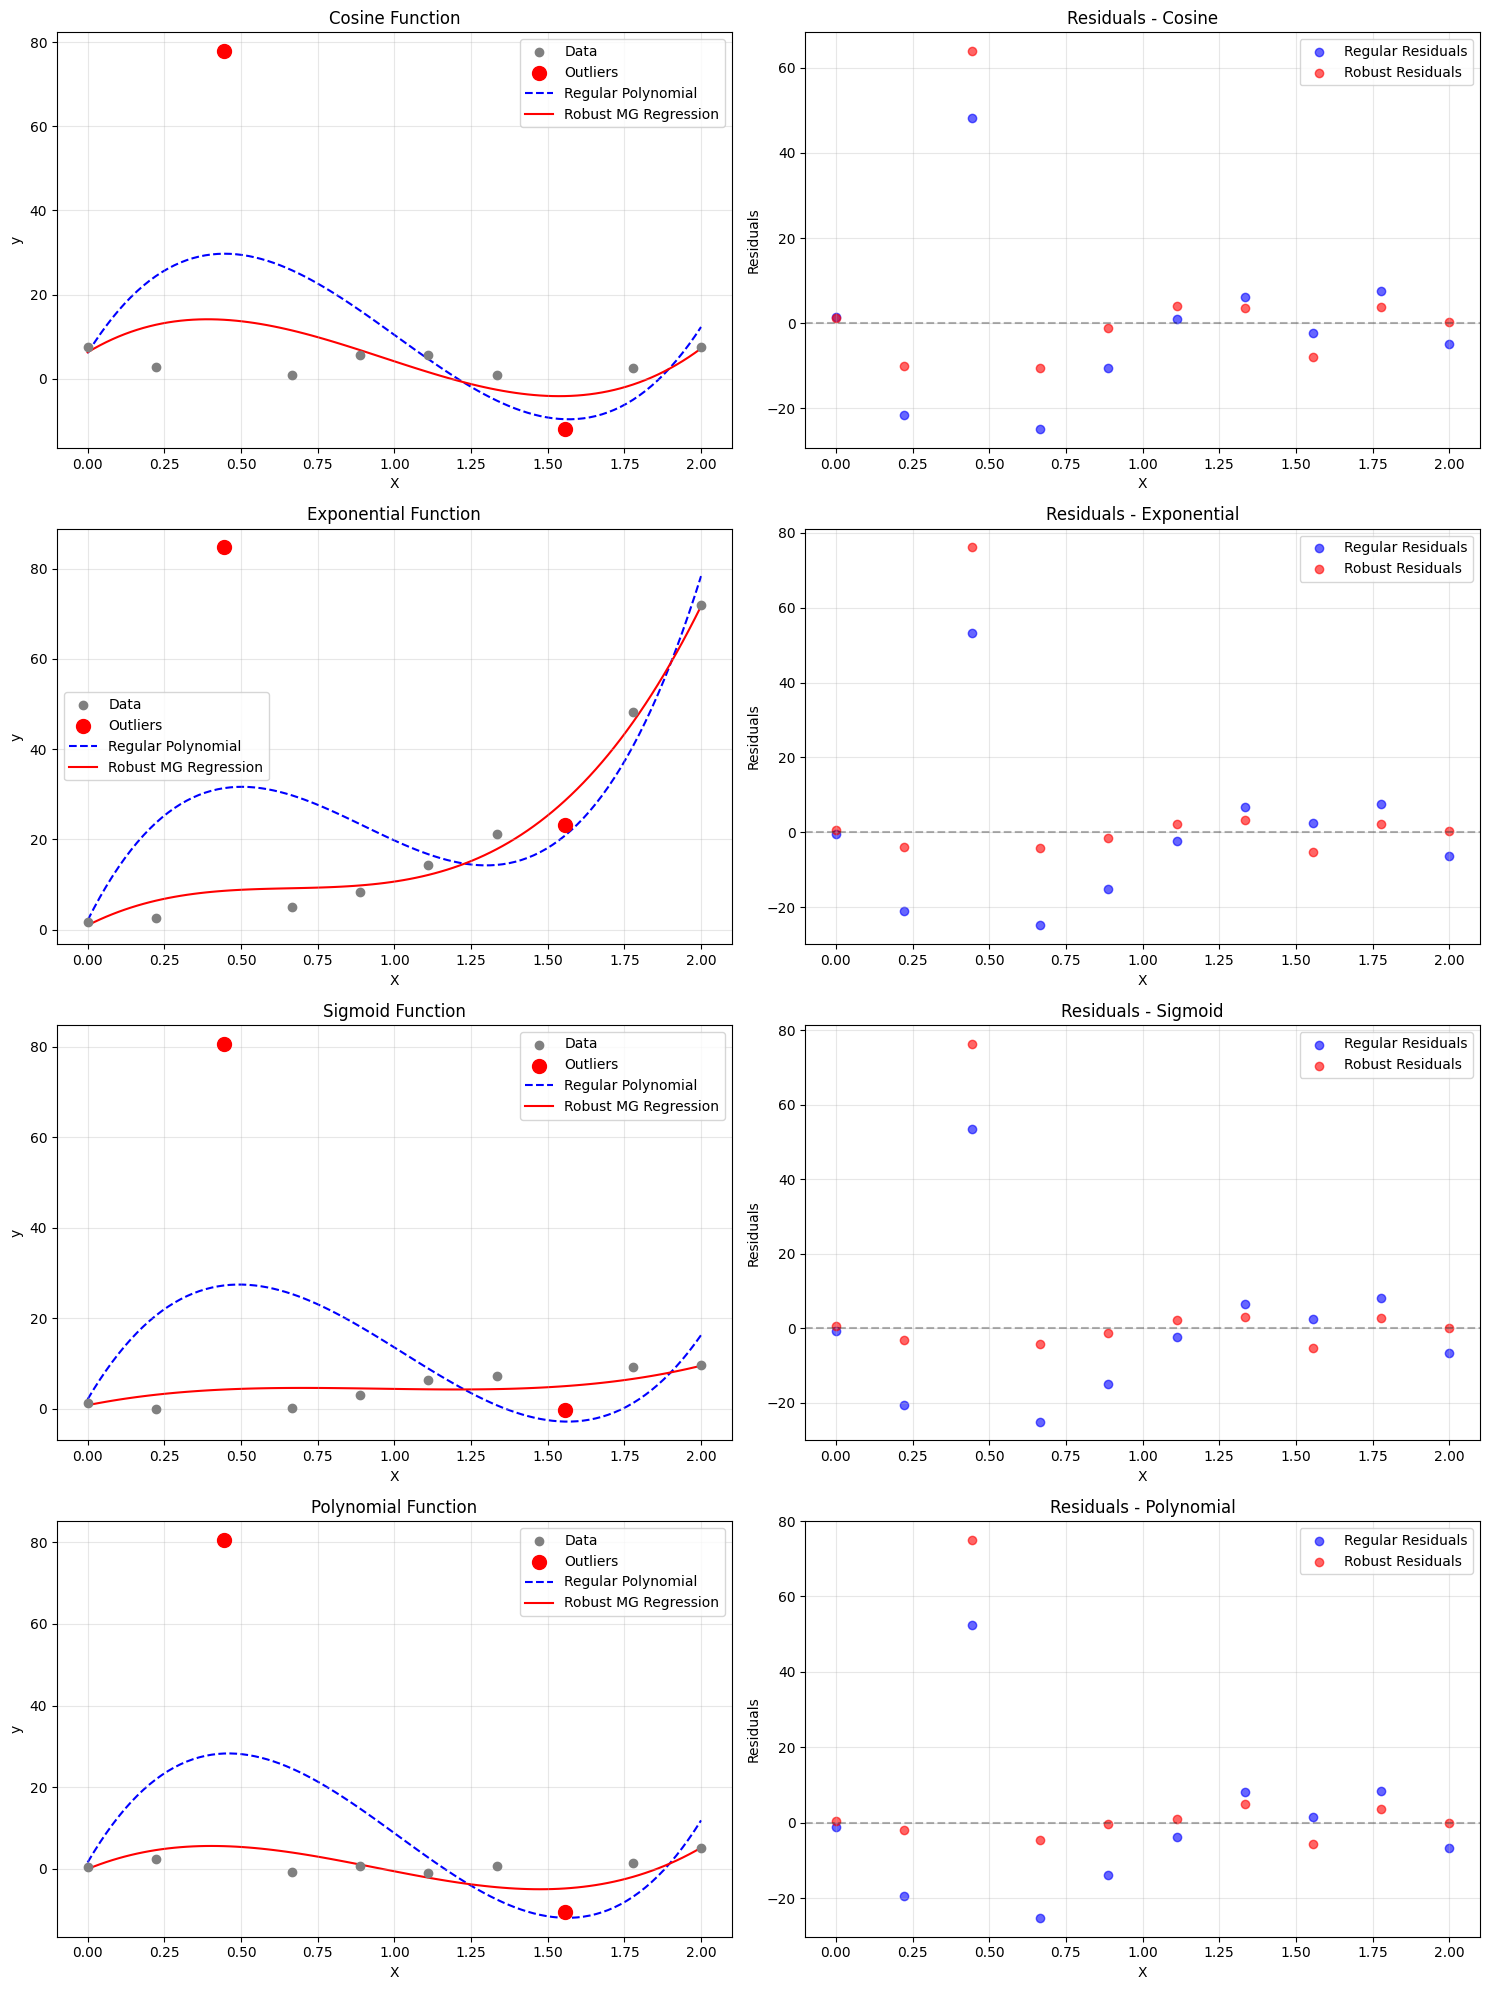

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)
outlier_positions=[2, 7]

# Create multiple test functions
def generate_data(func_type, X, noise_level=0.9, outlier_positions=outlier_positions, outlier_values=[80.0, -10.0]):
    if func_type == 'cosine':
        y = 5 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 10.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 2 * X.ravel()**3 - 3 * X.ravel()**2 + 1
    
    # Add noise
    y = y + np.random.normal(0, noise_level, len(X))
    
    # Add outliers
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 10).reshape(-1, 1)
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Fit models
    degree = 3  # Increased degree for more complex functions
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[outlier_positions], y[outlier_positions], color='red', s=100, label='Outliers', zorder=3)
    # axes[i,0].scatter(X[8:], y[2,8], color='red', s=100, label='Outliers', zorder=3)
    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Print metrics
    mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
    mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Robust MG Regression: {mse_robust:.4f}")

plt.tight_layout()
plt.show()

/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+03, tolerance: 1.136e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/src/magcal/characteristics.py:103: RuntimeWarning: overflow encountered in power
  self.q1 = np.power(R_safe, -2/S)
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/src/magcal/characteristics.py:193: RuntimeWarning: invalid value encountered in divide
  h = np.clip((q - q1) / denominator, -1.0, 1.0)



Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 69.6146
Ridge Regression:   169.2034
Lasso Regression:   170.8098
Robust MG:          109.5827

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 0.0004
Ridge Regression:   0.0906
Lasso Regression:   1.1154
Robust MG:          0.0007

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 1.1881
Ridge Regression:   9.0339
Lasso Regression:   9.8463
Robust MG:          1.7062

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 0.0000
Ridge Regression:   0.2884
Lasso Regression:   1.1419
Robust MG:          0.0000


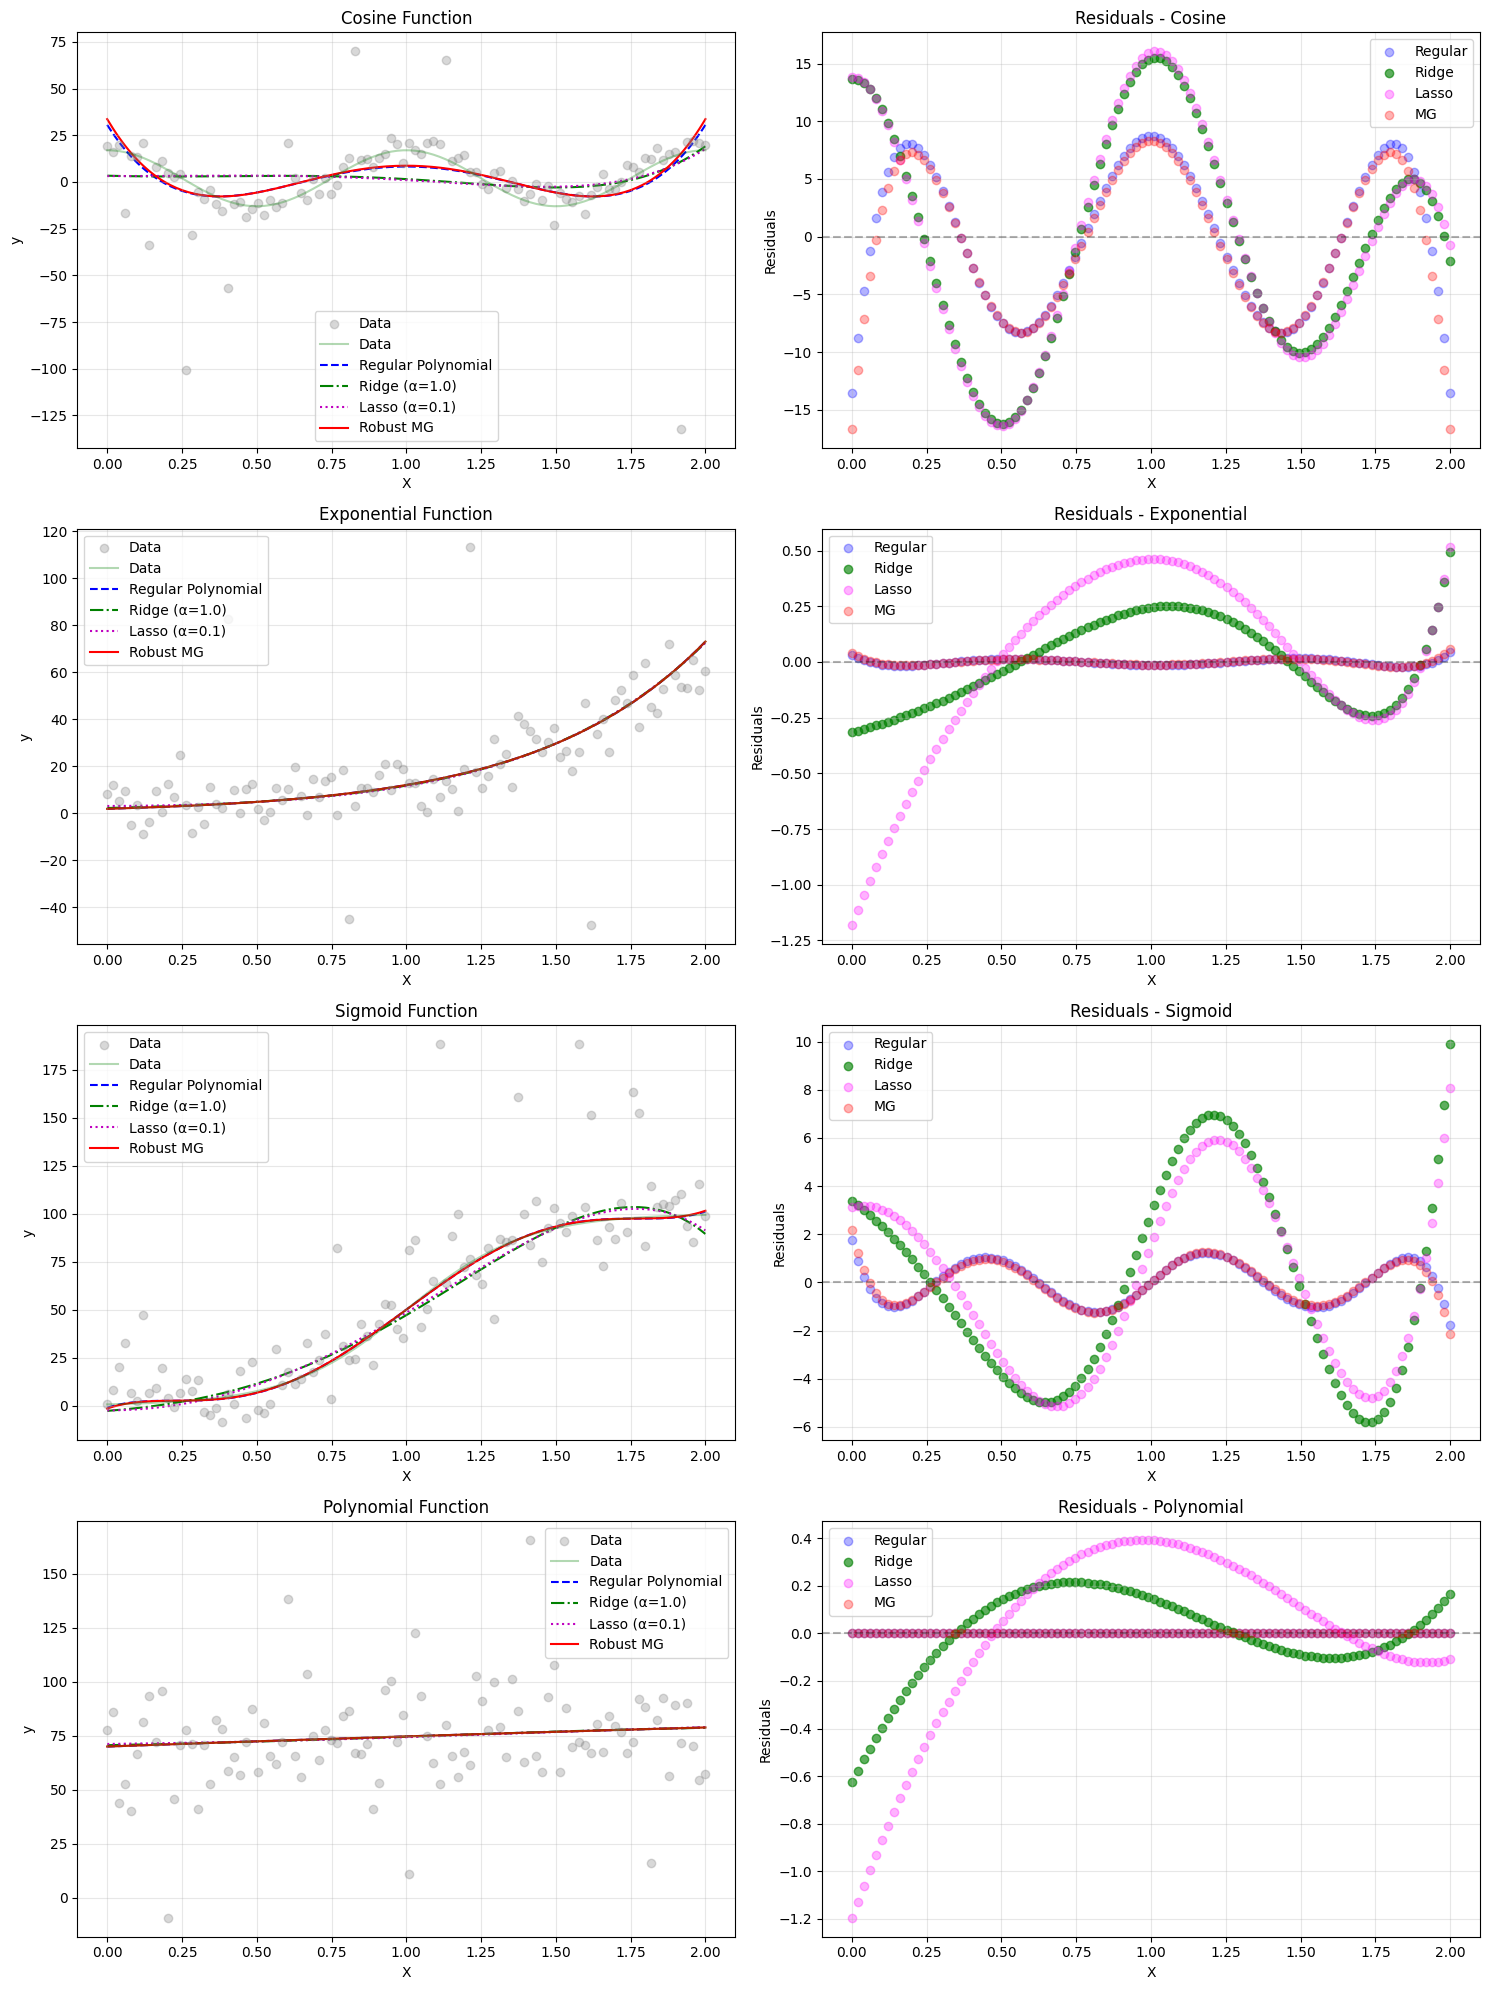

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

def generate_data(func_type, X, params):
    """Generate synthetic data with different profiles."""
    # Base function
    if func_type == 'cosine':
        y = params['amplitude'] * np.cos(params['frequency'] * X.ravel()) + params['offset']
    elif func_type == 'exponential':
        y = params['amplitude'] * np.exp(params['rate'] * X.ravel())
    elif func_type == 'sigmoid':
        y = params['amplitude'] / (1 + np.exp(-params['rate'] * (X.ravel() - params['midpoint'])))
    elif func_type == 'polynomial':
        y = (params['a'] * X.ravel()**3 + 
             params['b'] * X.ravel()**2 + 
             params['c'] * X.ravel() + 
             params['d'])
    
    # Add base noise
    y_ = y + np.random.normal(0, params['noise_level'], len(X))
    
    # Add trend if specified
    if params['trend'] != 0:
        y_ += params['trend'] * X.ravel()
    
    # Add outliers
    if params['outlier_mode'] == 'random':
        # Random outliers
        n_outliers = int(len(X) * params['outlier_fraction'])
        outlier_idx = np.random.choice(len(X), n_outliers, replace=False)
        outlier_values = np.random.normal(params['outlier_mean'], 
                                        params['outlier_std'], 
                                        n_outliers)
        y_[outlier_idx] += outlier_values
    elif params['outlier_mode'] == 'systematic':
        # Systematic outliers at specific positions
        y_[params['outlier_positions']] += params['outlier_values']
    
    return y, y_

# Define test profiles with different characteristics
test_profiles = {
    'cosine': {
        'amplitude': 15,
        'frequency': 2 * np.pi,
        'offset': 2,
        'noise_level': 5,
        'trend': 2,  # Linear trend
        'outlier_mode': 'random',
        'outlier_fraction': 0.1,
        'outlier_mean': 0,
        'outlier_std': 50
    },
    'exponential': {
        'amplitude': 2,
        'rate': 1.8,
        'noise_level': 8,
        'trend': -1,  # Negative trend
        'outlier_mode': 'systematic',
        'outlier_positions': [20, 40, 60, 80],
        'outlier_values': [80, -60, 100, -80]
    },
    'sigmoid': {
        'amplitude': 100,
        'rate': 5,
        'midpoint': 1,
        'noise_level': 10,
        'trend': 0,
        'outlier_mode': 'random',
        'outlier_fraction': 0.15,
        'outlier_mean': 50,
        'outlier_std': 30
    },
    'polynomial': {
        'a': 0.005,
        'b': -0.3,
        'c': 5,
        'd': 70,
        'noise_level': 15,
        'trend': 1.5,
        'outlier_mode': 'systematic',
        'outlier_positions': [10, 30, 50, 70, 90],
        'outlier_values': [-60, 80, -70, 90, -50]
    }
}

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 100).reshape(-1, 1)
    y, y_ = generate_data(func, X, test_profiles[func])
    X_test = np.linspace(0, 2, 200).reshape(-1, 1)
    
    # ... rest of the code remains the same ...
    
    # Fit models
    degree = 5  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y_, color='gray', label='Data', zorder=2, alpha=0.3)
    # true data
    axes[i,0].plot(X, y, color='g', label='Data', zorder=2, alpha=0.3)
    # true data)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.3)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.63)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.3)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.3)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

In [7]:
def generate_data(func_type, X, params):
    """Generate synthetic data with different profiles and outlier clusters."""
    # Base function
    if func_type == 'cosine':
        y = params['amplitude'] * np.cos(params['frequency'] * X.ravel()) + params['offset']
    elif func_type == 'exponential':
        y = params['amplitude'] * np.exp(params['rate'] * X.ravel())
    elif func_type == 'sigmoid':
        y = params['amplitude'] / (1 + np.exp(-params['rate'] * (X.ravel() - params['midpoint'])))
    elif func_type == 'polynomial':
        y = (params['a'] * X.ravel()**3 + 
             params['b'] * X.ravel()**2 + 
             params['c'] * X.ravel() + 
             params['d'])
    
    # Add base noise
    y_ = y + np.random.normal(0, params['noise_level'], len(X))
    
    # Add trend if specified
    if params['trend'] != 0:
        y_ += params['trend'] * X.ravel()
    
    # Add outlier clusters
    for cluster in params['outlier_clusters']:
        center = cluster['center']
        width = cluster['width']
        strength = cluster['strength']
        
        # Create cluster of outliers
        cluster_mask = np.abs(X.ravel() - center) < width/2
        n_points = np.sum(cluster_mask)
        
        if n_points > 0:
            # Generate cluster noise
            cluster_noise = np.random.normal(
                strength['mean'], 
                strength['std'], 
                n_points
            )
            y[cluster_mask] += cluster_noise
    
    return y, y_

# Define test profiles with outlier clusters
test_profiles = {
    'cosine': {
        'amplitude': 15,
        'frequency': 2 * np.pi,
        'offset': 2,
        'noise_level': 5,
        'trend': 2,
        'outlier_clusters': [
            {'center': 0.5, 'width': 0.2, 'strength': {'mean': 30, 'std': 10}},
            # {'center': 1.2, 'width': 0.3, 'strength': {'mean': -40, 'std': 15}},
            # {'center': 1.8, 'width': 0.2, 'strength': {'mean': 60, 'std': 12}}
        ]
    },
    'exponential': {
        'amplitude': 2,
        'rate': 1.8,
        'noise_level': 8,
        'trend': -1,
        'outlier_clusters': [
            # {'center': 0.3, 'width': 0.25, 'strength': {'mean': -60, 'std': 15}},
            {'center': 1.0, 'width': 0.2, 'strength': {'mean': 80, 'std': 20}},
            # {'center': 1.7, 'width': 0.3, 'strength': {'mean': -70, 'std': 18}}
        ]
    },
    'sigmoid': {
        'amplitude': 100,
        'rate': 5,
        'midpoint': 1,
        'noise_level': 10,
        'trend': 0,
        'outlier_clusters': [
            {'center': 0.4, 'width': 0.2, 'strength': {'mean': 90, 'std': 15}},
            # {'center': 1.1, 'width': 0.25, 'strength': {'mean': -50, 'std': 12}},
            # {'center': 1.6, 'width': 0.3, 'strength': {'mean': 40, 'std': 10}}
        ]
    },
    'polynomial': {
        'a': 0.005,
        'b': -0.3,
        'c': 5,
        'd': 70,
        'noise_level': 15,
        'trend': 1.5,
        'outlier_clusters': [
            # {'center': 0.6, 'width': 0.3, 'strength': {'mean': -80, 'std': 20}},
            {'center': 1.3, 'width': 0.2, 'strength': {'mean': 90, 'std': 15}},
            # {'center': 1.9, 'width': 0.25, 'strength': {'mean': -60, 'std': 18}}
        ]
    }
}


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 91.1461
Ridge Regression:   25.4365
Lasso Regression:   31.2491
Robust MG:          67.9160

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 101.3236
Ridge Regression:   3.2241
Lasso Regression:   13.6155
Robust MG:          1.1676

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 208.2116
Ridge Regression:   315.6241
Lasso Regression:   220.8997
Robust MG:          5.9809

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 17.9070
Ridge Regression:   31.4071
Lasso Regression:   27.3951
Robust MG:          0.0161


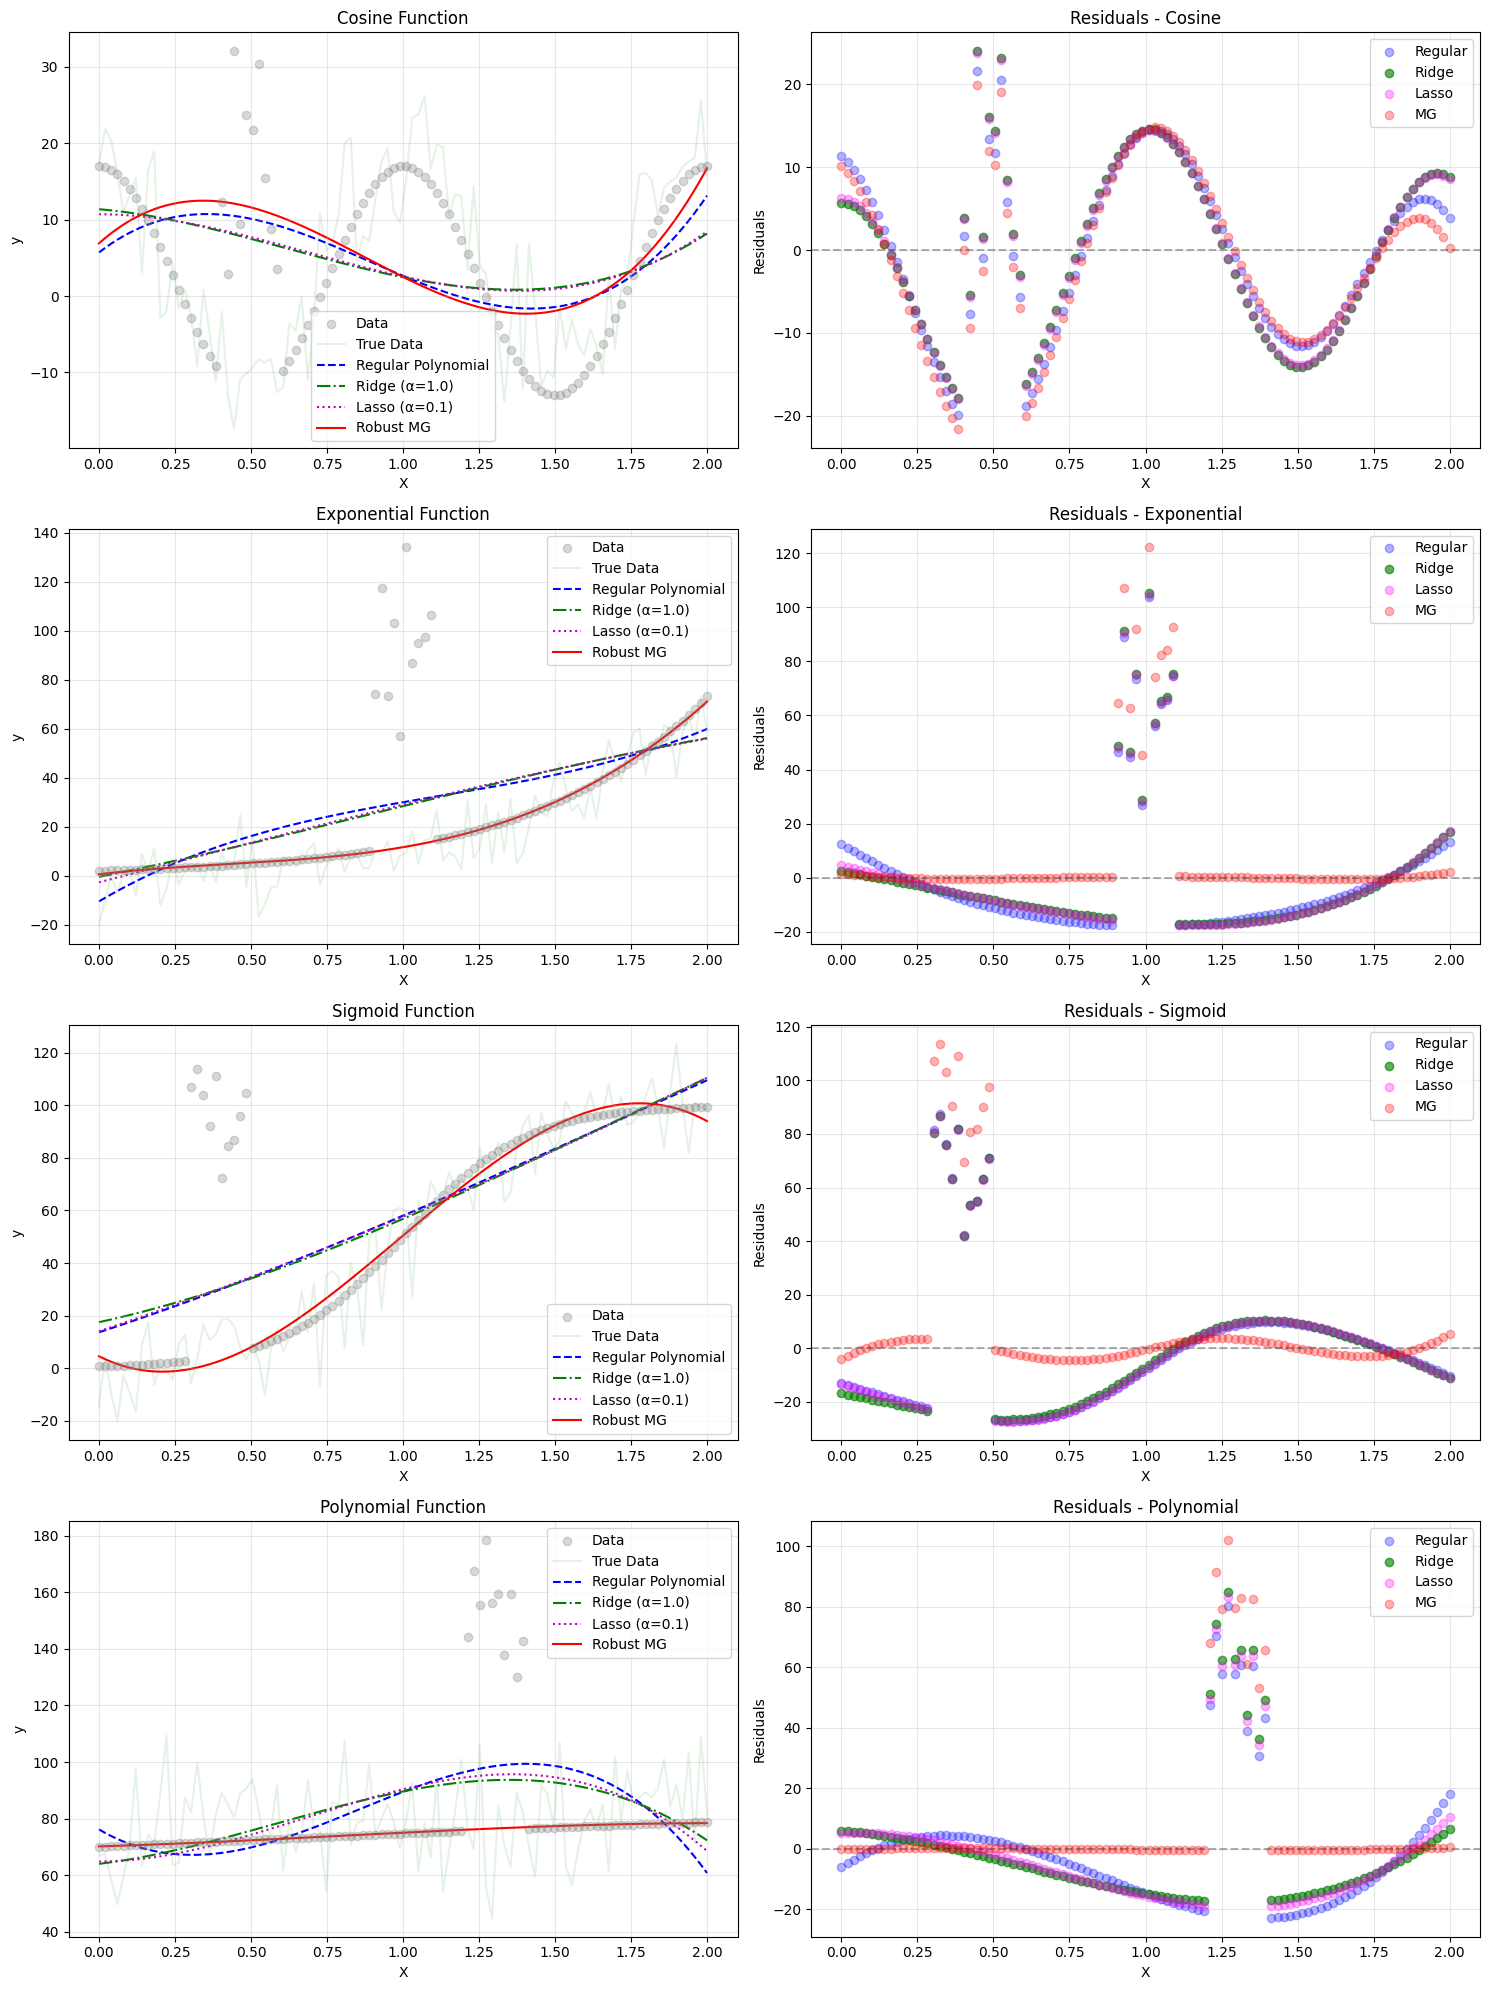

In [8]:
# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 100).reshape(-1, 1)
    y, y_clean = generate_data(func, X, test_profiles[func])
    X_test = np.linspace(0, 2, 200).reshape(-1, 1)
    
    # ... rest of the code remains the same ...
    
    # Fit models
    degree = 3  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2, alpha=0.3)
    # line plot -true data
    axes[i,0].plot(X, y_clean, color='g', alpha=0.1, label='True Data', zorder=2)
    # Highlight outliers
    # axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.3)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.63)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.3)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.3)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 97.7294
Ridge Regression:   102.6656
Lasso Regression:   101.8404
Robust MG:          99.7118

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 474.6336
Ridge Regression:   483.2078
Lasso Regression:   480.9685
Robust MG:          597.4914

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 675.9240
Ridge Regression:   675.6121
Lasso Regression:   675.7231
Robust MG:          913.0318

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 621.3686
Ridge Regression:   657.7784
Lasso Regression:   640.2269
Robust MG:          862.4921


/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.328e+01, tolerance: 8.013e+00
  model = cd_fast.enet_coordinate_descent(


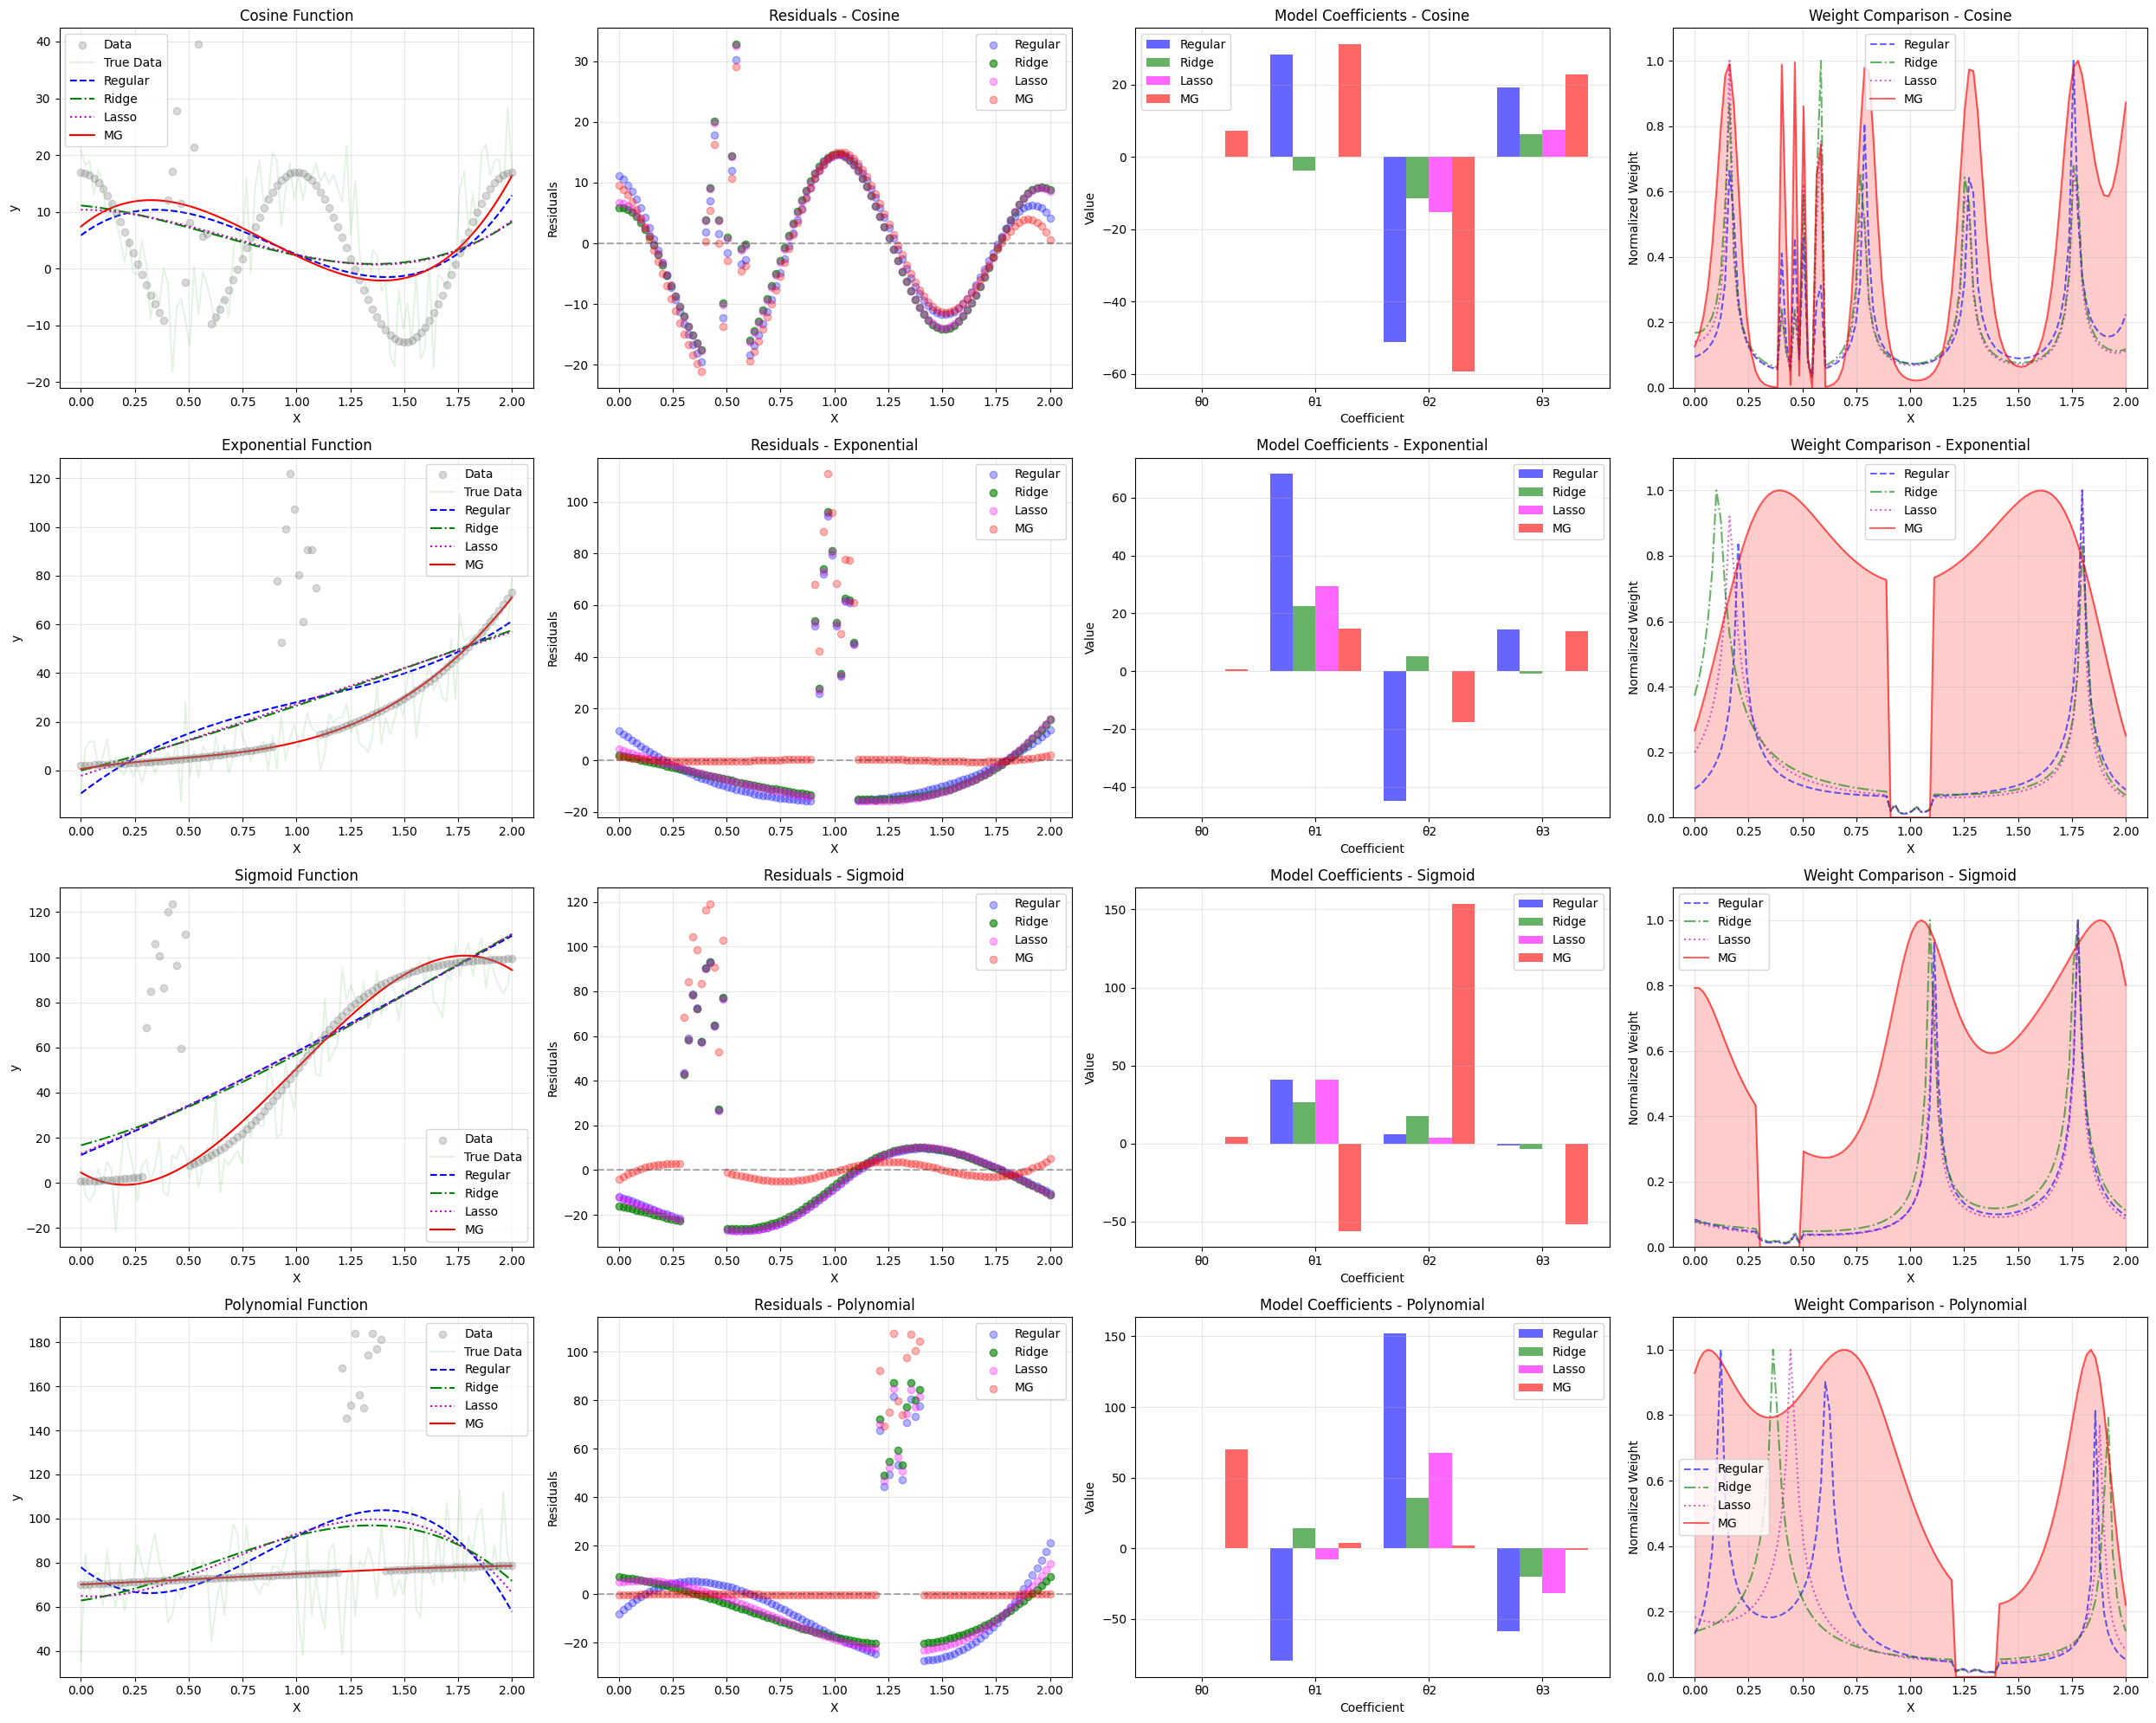

In [9]:
# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 4, figsize=(25, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data
    X = np.linspace(0, 2, 100).reshape(-1, 1)
    y, y_clean = generate_data(func, X, test_profiles[func])
    X_test = np.linspace(0, 2, 200).reshape(-1, 1)
    
    # Fit models
    degree = 3  # Reduced degree due to fewer points
    
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X, y)
    y_pred_regular = poly_reg.predict(X)
    y_pred_regular_test = poly_reg.predict(X_test)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X, y)
    y_pred_ridge = ridge_reg.predict(X)
    y_pred_ridge_test = ridge_reg.predict(X_test)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X, y)
    y_pred_lasso = lasso_reg.predict(X)
    y_pred_lasso_test = lasso_reg.predict(X_test)
    
    # Machine Gnostics regression
    mg_model = RobustRegressor(degree=degree)
    mg_model.fit(X, y)
    y_pred_robust = mg_model.predict(X)
    y_pred_robust_test = mg_model.predict(X_test)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves (first subplot)
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2, alpha=0.3)
    axes[i,0].plot(X, y_clean, color='g', alpha=0.1, label='True Data', zorder=2)
    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals (second subplot)
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.3)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.63)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.3)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.3)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Plot coefficients comparison (third subplot)
    coef_names = [f'θ{j}' for j in range(degree + 1)]
    x_pos = np.arange(len(coef_names))
    width = 0.2
    
    # Get coefficients from all models
    regular_coef = poly_reg.named_steps['linearregression'].coef_
    ridge_coef = ridge_reg.named_steps['ridge'].coef_
    lasso_coef = lasso_reg.named_steps['lasso'].coef_
    mg_coef = mg_model.coefficients
    
    # Plot coefficients
    axes[i,2].bar(x_pos - 1.5*width, regular_coef, width, label='Regular', color='blue', alpha=0.6)
    axes[i,2].bar(x_pos - 0.5*width, ridge_coef, width, label='Ridge', color='green', alpha=0.6)
    axes[i,2].bar(x_pos + 0.5*width, lasso_coef, width, label='Lasso', color='magenta', alpha=0.6)
    axes[i,2].bar(x_pos + 1.5*width, mg_coef, width, label='MG', color='red', alpha=0.6)
    
    axes[i,2].set_xlabel('Coefficient')
    axes[i,2].set_ylabel('Value')
    axes[i,2].set_title(f'Model Coefficients - {func.capitalize()}')
    axes[i,2].set_xticks(x_pos)
    axes[i,2].set_xticklabels(coef_names)
    axes[i,2].legend()
    axes[i,2].grid(True, alpha=0.3)
    
    # Plot weights comparison (fourth subplot)
    # Use inverse of absolute residuals as weights for traditional methods
    reg_weights = 1 / (1 + np.abs(residuals_regular))
    ridge_weights = 1 / (1 + np.abs(residuals_ridge))
    lasso_weights = 1 / (1 + np.abs(residuals_lasso))
    
    # Normalize all weights to [0,1]
    reg_weights = reg_weights / np.max(reg_weights)
    ridge_weights = ridge_weights / np.max(ridge_weights)
    lasso_weights = lasso_weights / np.max(lasso_weights)
    mg_weights = mg_model.weights / np.max(mg_model.weights)
    
    axes[i,3].plot(X, reg_weights, 'b--', label='Regular', alpha=0.6)
    axes[i,3].plot(X, ridge_weights, 'g-.', label='Ridge', alpha=0.6)
    axes[i,3].plot(X, lasso_weights, 'm:', label='Lasso', alpha=0.6)
    axes[i,3].plot(X, mg_weights, 'r-', label='MG', alpha=0.6)
    axes[i,3].fill_between(X.ravel(), mg_weights, alpha=0.2, color='red')
    
    axes[i,3].set_xlabel('X')
    axes[i,3].set_ylabel('Normalized Weight')
    axes[i,3].set_title(f'Weight Comparison - {func.capitalize()}')
    axes[i,3].legend()
    axes[i,3].grid(True, alpha=0.3)
    axes[i,3].set_ylim(0, 1.1)

    # Calculate and print metrics
    good_indices = np.setdiff1d(np.arange(len(X)), outlier_positions)
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()